## 1. Abundance of Digitized Text

### 1.1 Notations for strings and the Python str Class

    S = "CGTAAACTGCTTTAATCAAACGC"
    
prefix:
    - any substring of the form S[0:k] for 0 <= k <= n
    - 'CGT' is a prefix of S
suffix:
    - any substring of the form S[j:n] for 0<= j <= n
    - 'AAACGC' is a suffix of S
    
The null string is a prefix and suffix of any string.

## 2. Pattern-Matching Algorithms

Given a text string T of length n, and a pattern string P of length m, find whether P is a substring of T.
    - If so, find the lowest index j within T at which P begins
    - Such that T[j: j+m] equals P
    
The pattern-matching problem is inherent to many behaviors of Python's str class, such as:
    - P in T
    - T.find(P)
    - T.index(P)
    - T.count(P)
    - T.partition(P)
    - T.split(P)
    - T.replace(P, Q)
    
### 2.1 Brute Force

Enumerate all possible configurations of the inputs.

In [1]:
def find_brute(T, P):
    '''
    Return the lowest index of T at which substring P begins
    Or else -1
    '''
    n, m = len(T), len(P)
    for i in range(n-m+1):
        k = 0
        while k < m and T[i+k] == P[k]:
            k += 1
        if k == m:
            return i
    return -1

#### Performance

The worst-case running time of the brute-force is O(nm)
    - The outer loop runs at most n-m+1 times
    - The inner while loop runs at most m times

### 2.2 The Boyer-Moore Algorithm

Avoid comparisons between P and a sizable fraction of the characters in T.

1. Looking-Glass Heuristic:
    - When testing a possible placement of P against T, begin the comparisons from the end of P and move backward to the front of P

2. Character-Jump Heuristic:
    - A mismatch of text character T[i] = c with the corresponding pattern character P[k]:
        - If c is not contained anywhere in P, then shift P completely past T[i]
        - Otherwise, shift P until last occurrence of character c in P gets aligned with T[i]
        
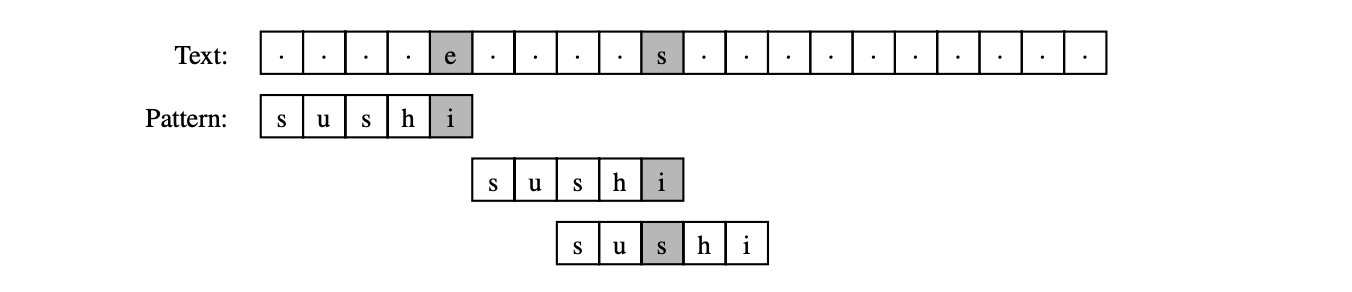

上图中

pattern不包含e，所以在mismatch时将pattern entirely shift beyond this location

pattern中包含s，所以shift pattern直到pattern中上一个出现的s与该位置对齐

在 Character-Jump 的第二种情况下，即mismatched character occurs elsewhere in the pattern，考虑两种情况：
1. Last occurrence is before the character of the pattern that was aligned with the mismatched.
    - j < k
    - shift the pattern by k-j units
    - index i advances by m-(j+1) units

2. Last occurrence is after the character of the pattern.
    - j > k
    - shift the pattern by one unit
    - index i advances by m-k units
    - 并不消耗时间寻找之前一个occurrence

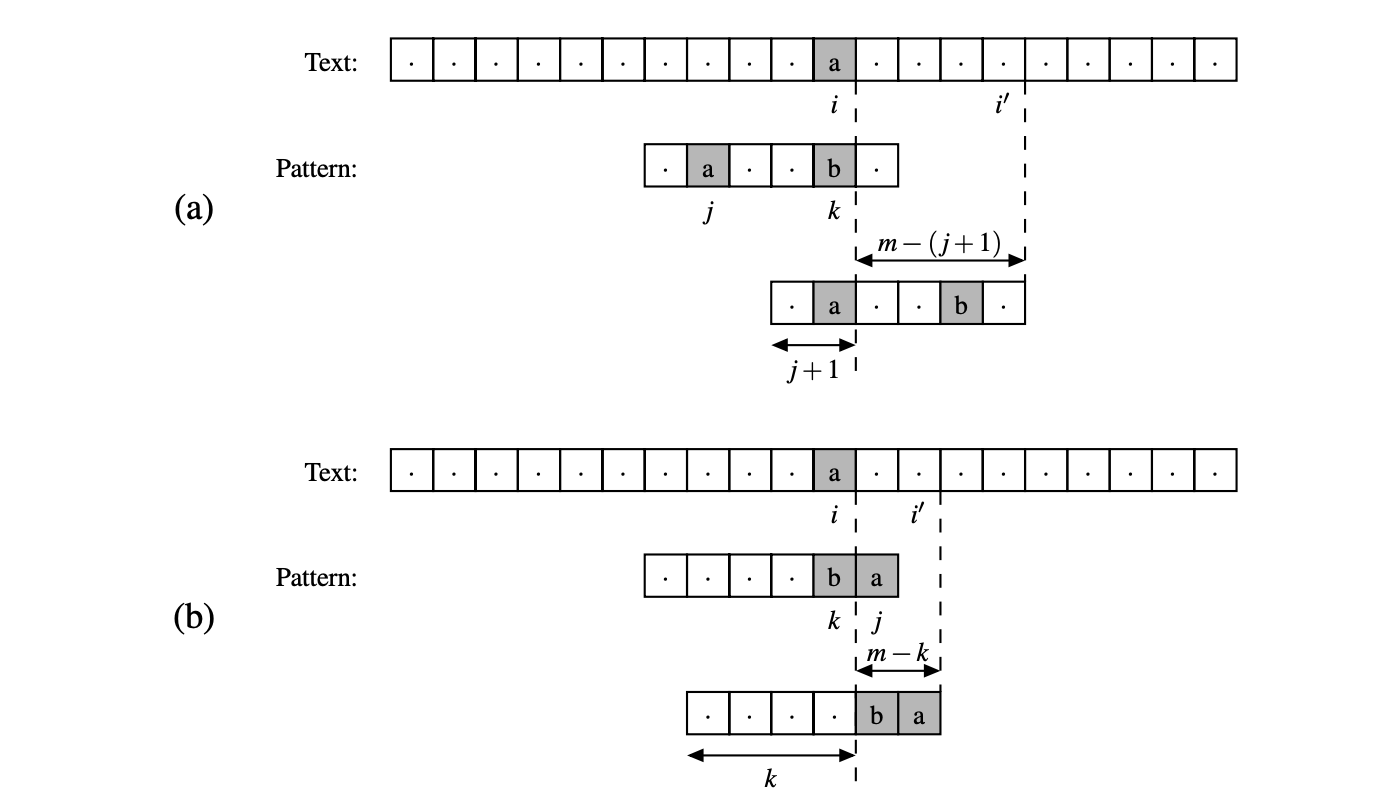

Last:
    - If c is in P, last(c) is the index of the last occurrence of c in P
    - Otherwise, last(c) = -1

In [2]:
def find_boyer_moore(T, P):
    '''
    Return the lowest index of T at which substring P begins
    Or else -1
    '''
    n, m = len(T), len(P)
    if m == 0:
        return 0
    # build 'last' dictionary
    last = {}
    for k in range(m):
        last[P[k]] = k
    # align end of pattern at index m-1 of text
    i = m - 1
    k = m - 1
    while i < n:
        if T[i] == P[k]:
            if k == 0:
                return i
            else:
                i -= 1
                k -= 1
        else:
            j = last.get(T[i], -1)
            i += m - min(k, j+1)
            k = m - 1
    return -1

#### Performance

The worst-case running time if O(nm + |$\sum$|)

### 2.3 The Knuth-Morris-Pratt Algorithm (KMP)

Avoids the waste of information. 

Worst-case pattern-matching:
    - The algorithm will have to examine all the characters of the text and all the characters of the pattern at least once.
    
KMP: 
    - Precompute self-overlaps between portions of the pattern so that when a mismatch occurs at one location, we immediately know the maximum amount to shift the pattern before continuing the search.

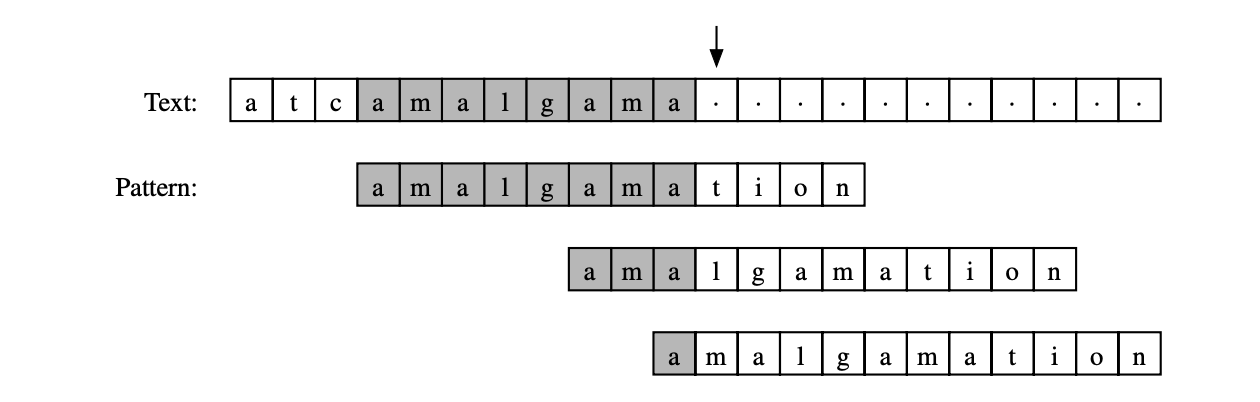


#### Failure Function

failure function f
    - Indicates the proper shift of P upon a failed comparisons.
    - f(k) is defined as the length of the longest prefix of P that is a suffix of P[1:k+1]

If we find a mismatch upon character P[k+1], f(k) tells us how many of the immediately preceding characters can be reused to restart the pattern.

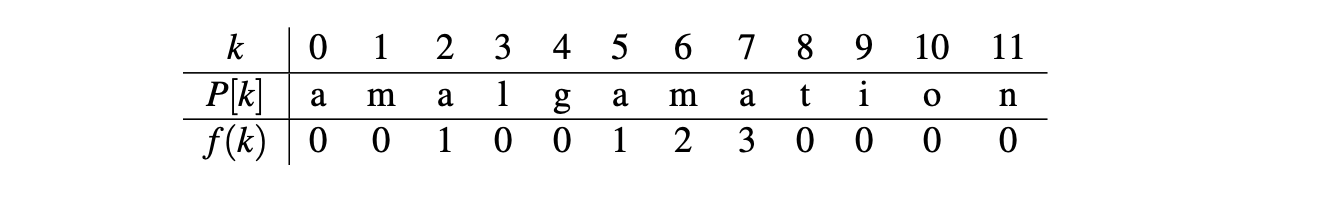

#### Implementation

In [3]:
def compute_kmp_fail(P):
    '''
    Utility that computes and return KMP 'fail' list
    '''
    m = len(P)
    # by default, presume overlap of 0 everywhere
    fail = [0] * m
    j = 1
    k = 0
    while j < m:
        if P[j] == P[k]:
            fail[j] = k + 1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return fail
    
def find_kmp(T, P):
    '''
    Return the lowest index of T at which substring P begins
    or else -1
    '''
    n, m = len(T), len(P)
    if m == 0:
        return 0
    fail = compute_kmp_fail(P)
    j = 0
    k = 0
    while j < n:
        if T[j] == P[k]:
            if k == m - 1:
                return j - m + 1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return -1

#### Performance

Performs in O(n + m) time
    - The KMP pattern-matching is at most 2n
    - The failure function if O(m)

## 3. Dynamic Programming

Dynamic programming can often be used to take problems that seem to require exponential time and produce polynomial-time algorithms to solve them.

### 3.1 Matrix Chain-Product

Let B be a 2 * 10 matrix, C be a 10 * 50 matrix, and D be a 50 * 20 matrix.
    - Computing B * (C * D) require 
        2 * 10 * 20 + 10 * 50 * 20=10400 multiplications
    - COmputing (B * C) * D require 
        2 * 10 * 50 + 2 * 50 * 20 = 3000 multiplications
        
The matrix chain product problem is to determine the parenthesization of the expression that minimizes the total number of scalar multiplications performed.


#### Defining Subproblems

To enumerate all the possible ways of parenthesizing the expression, there are an exponential number of ways (n^2)

Divide the problem into subproblems. 


Use $N_{i,j}$ to denote the minimum number of multiplications needed to compute the subexpression from $A_{i}$ to $A_{j}$

#### Characterizing Optimal Solutions

Subproblem optimality condition:
    - It is possible to characterize an optimal solution to a particular subproblem.
    
The full parenthesization of a subexpression has to be of the form

$$(A_i * ... * A_k) * (A_{k+1} * A_j)\;\;\text{for some k} \in \{i, i+1, ..., j-1\}$$

If the k is the correct one, the products $(A_i * ... * A_k)$ and $(A_{k+1} * A_j)$ must also be solved optimally.

#### Designing a Dynamic Programming Algorithm

The optimal subproblem solution $N_{i, j}$

$$ N_{i, j} = min \;\{ N_{i, k}+N_{k+1, j} + d_id_{k+1}d_{j+1} \} \;\; \text{for i<=k<j}$$

In the above equation
1. $N_{i, k}+N_{k+1, j}$
    - The number of multiplications needed to compute each subexpression
2. $d_id_{k+1}d_{j+1}$
    - The number of multiplications needed to perform the final matrix multiplication
    - 即求解 M_{i,k+1} * M_{k+1,j}时需要运算乘法的次数
    
#### sharing of subproblems
    - 我们可以重复利用已经得到结果的subproblem

已知$N_{i,i} = 0$，因为对于单个的矩阵没有乘法运算的需要

$$N_{i, i+1} = N_{i, i}+N_{i+1, i+1} + d_id_{i+1}d_{i+2}$$

并可进一步得到

$$N_{i, i+2} = N_{i, i+1}+N_{i+2, i+2} + d_id_{i+2}d_{i+3}$$

由此可逐步得到$N_{i, j}$ 的解

In [4]:
def matrix_chain(d):
    '''
    d is a list of n+1 numbers such that size of kth matrix is d[k]-by-d[k+1]
    
    return an n-by-n table such that N[i][j] represents the minimum number of
    multiplications needed to compute the product of Ai through Aj inclusive
    '''
    # number of matrices
    n = len(d) - 1
    N = [[0] * n for i in range(n)]
    
    # number of products in subchain
    for b in range(1, n):
        # start of subchain
        for i in range(n-b):
            j = i + b
            N[i][j] = min(N[i][k] + N[k+1][j] + d[i]*d[k+1]*d[j+1] for k in range(i,j))
    return N

In [5]:
d = [1,2,3,4,5]
matrix_chain(d)

[[0, 6, 18, 38], [0, 0, 24, 64], [0, 0, 0, 60], [0, 0, 0, 0]]

Thus, we can compute with an algorithm that consists primarily of three nested loops, each of these loops iterates at most n times perexecution.


The total running time is O($n^3$)

### 3.2 DNA and Text Sequence Alignment

Longest common subsequence(LCS) problem:
    - Given two character strings X and Y, find a longest string S that is a subsequence of both X and Y
    - AAAG is a subsequence of the string CGATAATTGAGA
    - subsequence由原string中可不连续，但顺序不变的character组成
    - The brute-force approach takes O(2^n * m) time
        there are potentially 2^n different subsequences of X
        each subsequence takes O(m) the check whether exist in Y

#### The components of a Dynamic Programming Solution

Dynamic programming is used primarily for **Optimization** problem, where we wish to find the best way of doing something.

Applying the dynamic programming is the problem:
1. Simple subproblems
    - The global optimization problem can be repeatedly breaking into subproblems
    - There should be a way to parameterize subproblems with just a few indices, like i, j, k and so on
2. Subproblem Optimization
    - An optimal solution to the global problem must be a composition of optimal subproblem solutions
3. Subproblem Overlap
    - Optimal solutions to unrelated subproblems can contain subproblems in common

#### Applying Dynamic Programming to the LCS problem

subproblem:


Compute the value $L_{j,k}$ which denote the length of a longest string that is a subsequence of both prefixes X[0:j] and Y[0:k]

There are two cases when computing $L_{j,k}$:

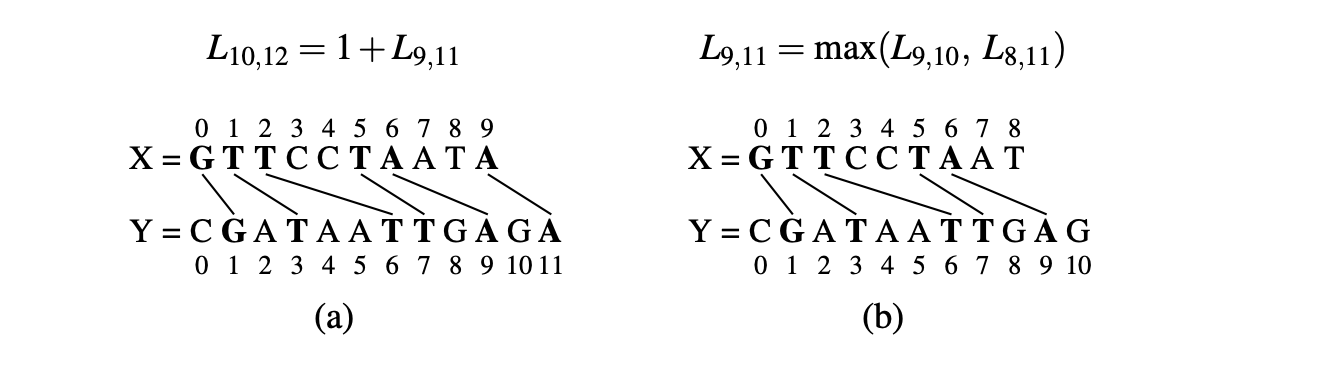

1. $x_{j-1} = y_{k-1}$
    - The last character of each X[0:j] and Y[0:k] must belongs to a longest common subsequence
    - So we have
    
$$L_{j,k} = 1 + L_{j-1,k-1}\;\; \text{if} \;\;x_{j-1} = y_{k-1} $$

2. $x_{j-1} != y_{k-1}$
    - We cannot have a common subsequence that includes both X[j-1] and Y[k-1]
    - So we can have a common subsequence end with X[j-1] or one that ends with Y[k-1] or neither, but certainly not both
    
$$L_{j,k} = max \{ L_{j-1,k},L_{j,k-1}\}\;\; \text{if} \;\;x_{j-1} != y_{k-1} $$

Also, there have $L_{j,0} = 0$ and $L_{0,k} = 0$

#### The LCS Algorithm

The L table defined for 0 <= j <= n and 0 <= k <= m

In [6]:
def LCS(X, Y):
    '''
    Return table such that L[j][k] is length of LCS for X[0:j] and Y[0:k]
    '''
    n, m = len(X), len(Y)
    # build a (n+1) * (m+1) table
    L = [[0] * (m + 1) for k in range(n + 1)]
    for j in range(n):
        for k in range(m):
            if X[j] == Y[k]:
                L[j+1][k+1] = L[j][k] + 1
            else:
                L[j+1][k+1] = max(L[j][k+1], L[j+1][k])
    return L

#### Analysis

The LCS algorithm takes O(nm) time

In [7]:
def LCS_solution(X, Y, L):
    '''
    Return the longest common substring of X and Y, given LCS table L
    '''
    solution = []
    j, k = len(X), len(Y)
    # common character remain
    while L[j][k] > 0:
        if X[j-1] == Y[k-1]:
            solution.append(X[j-1])
            j -= 1
            k -= 1
        elif L[j-1][k] >= L[j][k-1]:
            j -= 1
        else:
            k -= 1
    return ''.join(reversed(solution))

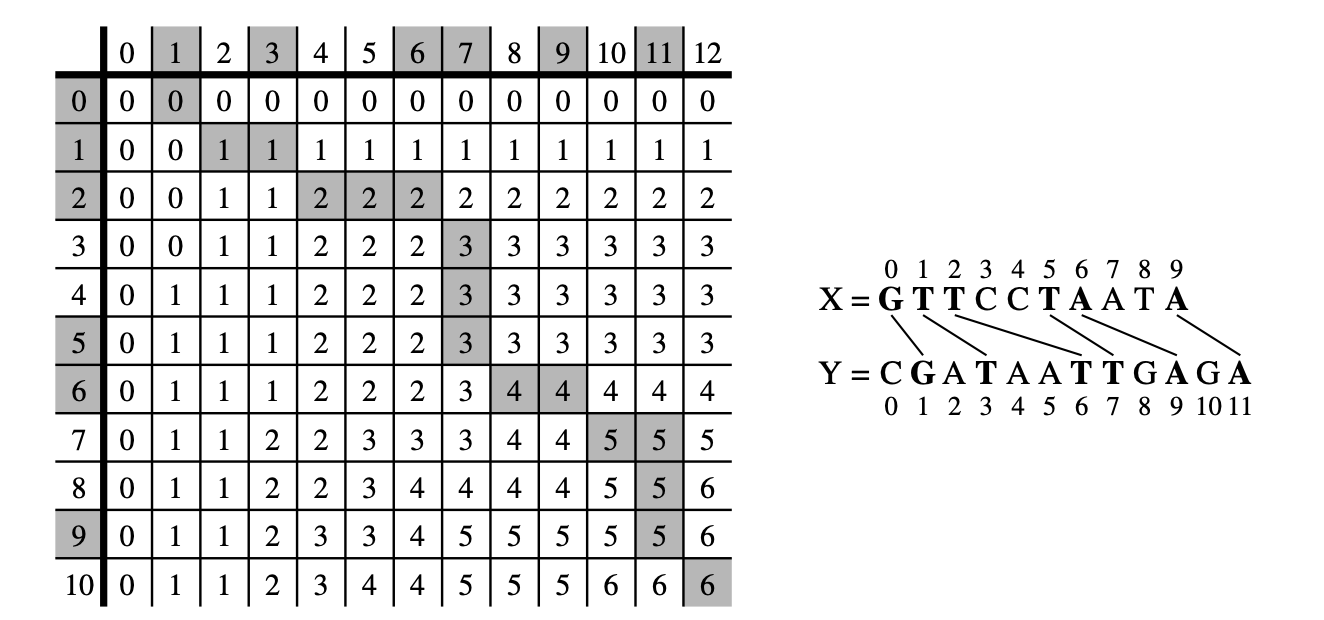

## 4. Text Compression and the Greedy Method

Text Compression:
    - Given a string X defined over some alphabet, efficiently encode X into a small binary string Y(using only 0 and 1)
    
Standard encoding schemes:
    - Like ASCII
    - Use fixed-length binary strings to encode characters
    
    
Huffman code encoding schemes
    - Save more space over a fixed-length encoding
    - Using short code-word string encode high-frequency characters
    - Using long code-word string encode low-frequency characters
    
To avoid ambiguities
    - No code-word is a prefix of another code-word
    
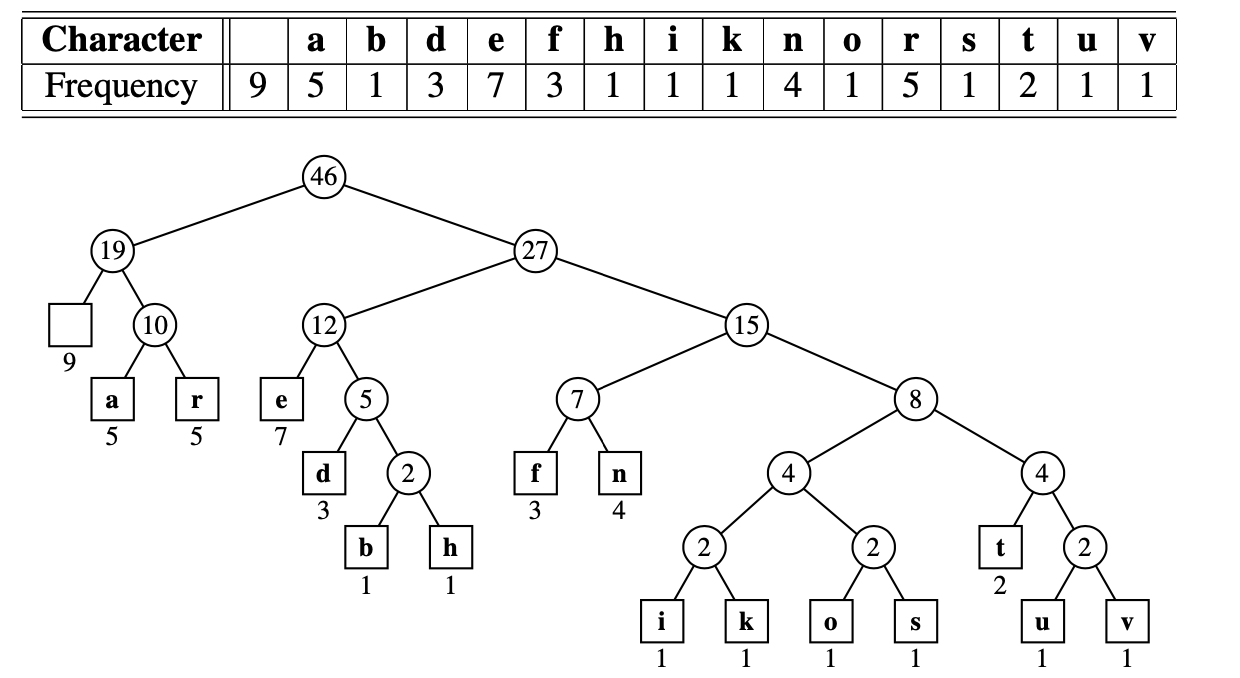

Huffman algorithm 在binary tree 的基础上建立每一个character的code-word

1. 每一个edge代表code-word中的一个bit
    - 指向 left child 代表‘0’
    - 指向 right child 代表‘1’
2. 每一个叶子代表一个特定的character
    - 这个character 的 code-word 即为从根部开始指向叶节点的路径
    - f 的 code-word：‘1100’
3. 每一个internal node都有一个frequency
    - 为它的全部叶节点的frequencies的和

### The Huffman Coding Algorithm

Constructs an optimal prefix code for a string of length n with d distinct characters in 

O(n + dlogd) time
    - Each iteration of the while loop takes O(logd) time, and will execute d-1 time until only one tree is left at the Queue

Algorithm

    Huffman(X):
        Input: String X of length n with d distinct characters
        Output: Coding tree for X
        1. compute the frequency f(c) of each character c of X
        2. Initialize a priority queue Q
        3. for each character c in X do
            - Create a single node binary tree T storing c
            - Insert T into Q with key f(c)
        4. while len(Q) > 1 do
            - (f1, T1) = Q.remove_min()
            - (f2, T2) = Q.remove_min()
            - Create a new binary tree T with left subtree T1 and right subtree T2
            - Insert T into Q with key f1 + f2
        5. (f, T) = Q.remove_min()
        6. return tree T

### 4.2 The Greedy Method 贪心算法

在对问题求解时，总是做出在当前看来是最好的选择，即不从整体最优上加以考虑，得到的是在某种意义上的局部最优解
    - 一般用来解决求最大或最小解
    - 只能确定某些问题的可行性范围

使用条件：
1. 贪心选择性质
    - 一个问题的整体最优解可通过一系列局部的最优解的选择达到，并且每次选择可以依赖以前作出的选择
2. 最优子结构
    - 问题的最优解包含其子问题的最优解

举例：
    - 平时购物找零钱时，为使找回的零钱的硬币数最少，不要求找零钱的所有方案，而是从最大面值的币种开始，按递减的顺序考虑各面额，先尽量用大面值的面额，当不足大面值时才去考虑下一个较小面值


## 5. Tries 字典树

A Trie is a tree-based data structure for storing strings in order to support fast pattern matching.
    - Main application: Information retrieval
    - pattern mathcing and prefix matching

Trie树，即字典树，又称单词查找树或键树，是一种树形结构，是一种哈希树的变种。

典型应用是用于统计和排序大量的字符串（但不仅限于字符串），所以经常被搜索引擎系统用于文本词频统计。

它的优点是：最大限度地减少无谓的字符串比较，查询效率比哈希表高。

Trie的核心思想是空间换时间：
    - 利用字符串的公共前缀来降低查询时间的开销以达到提高效率的目的。


### 5.1 Standard Tries

Let S be a set of s strings from an alphabet, that no string in S is a prefix of another string.

A standard trie for S is an ordered tree T with the following properties:

1. Each node of T, except the root, is labeled with a character of the alphabet
2. The children of an internal node of T have distinct labels
3. T has s leaves, each associated with a string of S
    - 从根节点到某叶节点，路径上经过的字符连接起来，为该叶节点对应的字符串
    
Standard trie for the strings

    {bear, bell, bid, bull, buy, sell, stock, stop}
    
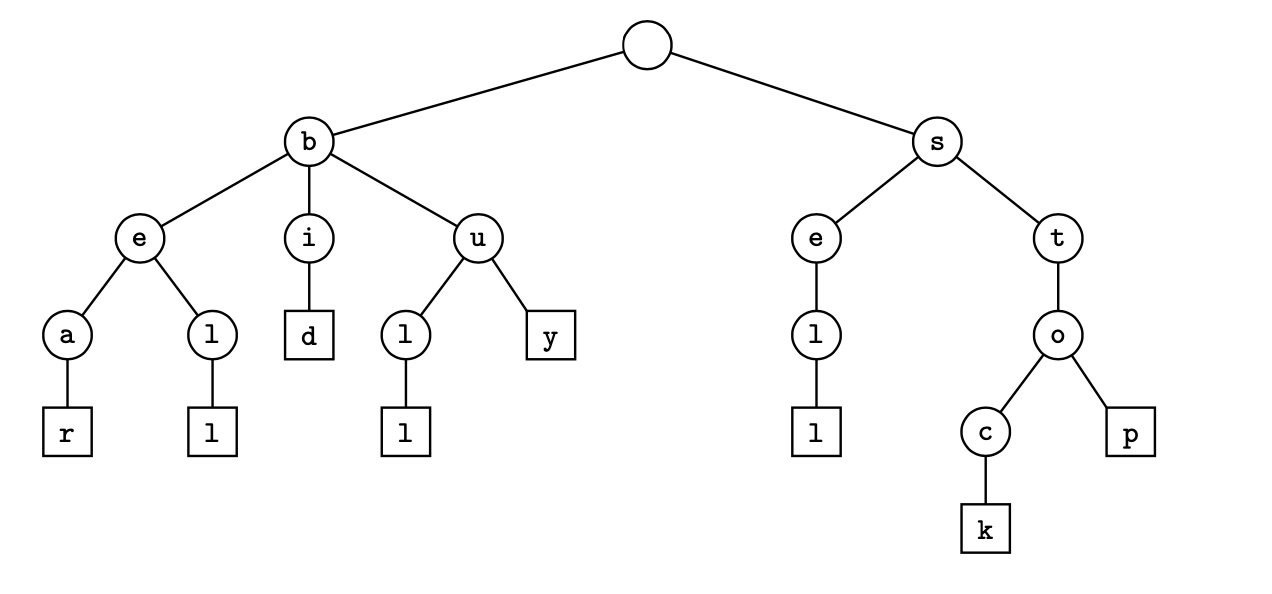

A standard trie storing a collection S of s strings of total length n from an alphabet $\sum$ has the following properties:

1. The height of T is equal to the length of the longest string in S
2. Every internal node of T has at most |$\sum$| children
3. T has s leaves
4. The number of nodes of T is at most n + 1
    - Occurs when no two strings share a common nonempty prefix
    - Except for the root, all internal nodes have one child


#### Analysis

Search:
    - O(m) for search a string of length of m
    
Insert:
    - O(n) Where n is the total length of the strings of S

### 5.2 Compressed Tries

A compressed trie ensures that each internal node in the trie has at least two children
    - Compressiong chains of single-child nodes into individual edges
        Replacing each redundant chain into a single edge, relabeling the node with the concatenation of the nodes
    
Redundant node:
    - if an internal node v has one child and is not the root
    
Redundant chain:
    - A chain of k >= 2 edges
    - 除了头部和尾部，其余的node均为redundant node

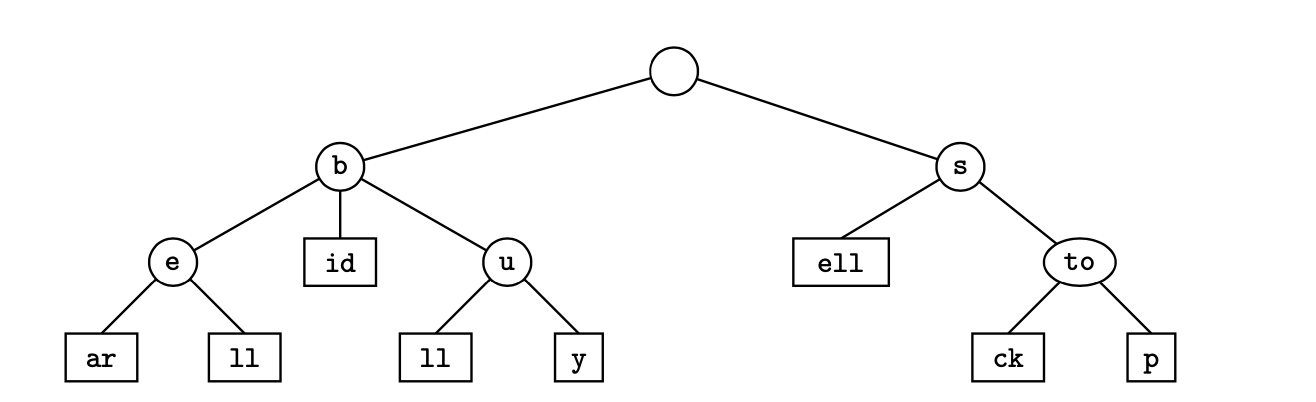

A compressed trie storing a collection S of s strings from an alphabet of size d has the following properties:
    - Every internal node of T has at least two children and at most d children
    - T has s leave nodes
    - The number of nodes of T is O(s)


A compressed trie is truly advantageous only when
    - It is used as an auxiliary index structure over a collection of strings already stored in a primary structure
    

Advantages Save Space, not saving time
    - The total space for the standard trie is O(n), now reduced to O(s)
    - The searching time is the same

### 5.3 Suffix Tries

Suffix Tries:
    - When the strings in the S are all the suffixes of a string X
    
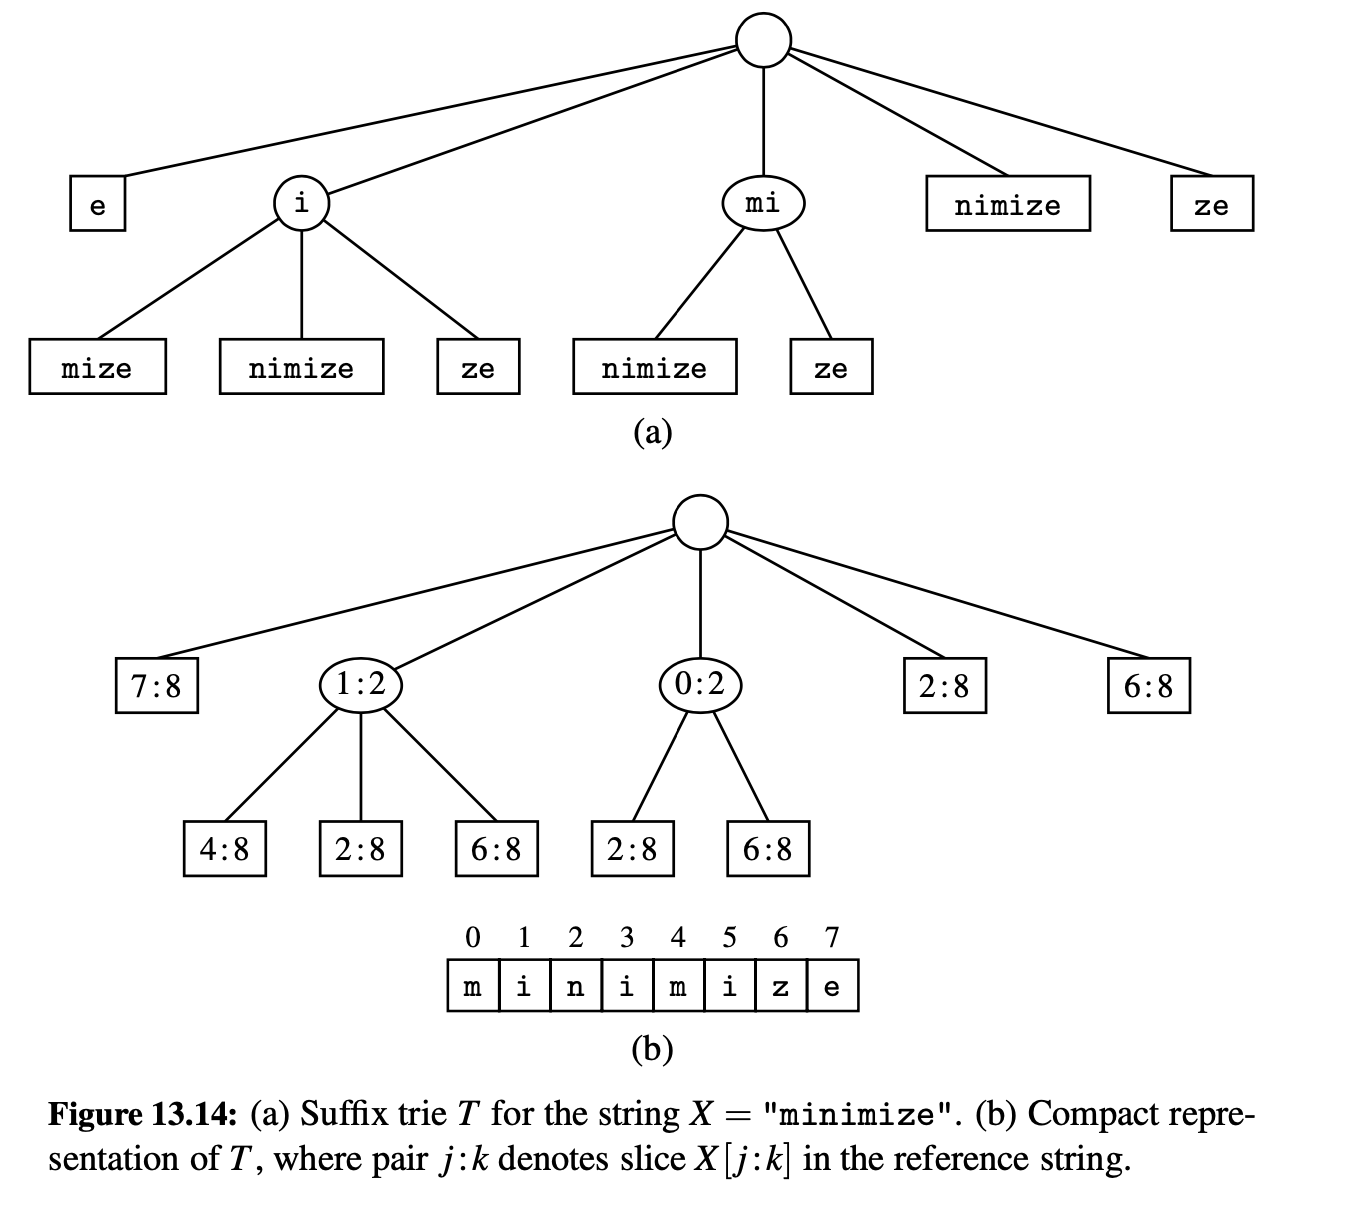

The compact representation of a suffix trie T for a string X of length n uses O(n) space

Used to efficiently perform pattern-matching queries on text X